In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import numpy as np
import matplotlib as mpl
import pandas as pd
import scipy as sp;


In [3]:
pwd

'/Users/amnon/git/paper-daycare'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the data

In [7]:
gan = ca.read_amplicon('data/gan-normalized.biom', 'data/gan-normalized_sample.txt', feature_metadata_file='data/gan-normalized_feature.txt',min_reads=1000, normalize=10000)

2021-07-03 12:06:37 INFO loaded 268 samples, 928 features
2021-07-03 12:06:37 WARNING Do you forget to normalize your data? It is required before running this function
2021-07-03 12:06:37 INFO After filtering, 268 remain.


In [8]:
gan=gan.split_taxonomy()

In [9]:
seqs=['TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGGGTGCGCAGGCGGTTGAGTAAGACAGATGTGAAATCCCCGAGCTTAACTCGGGAATGGCATATGTGACTGCTCGACTAGAGTGTGTCAGAGGGAGGTGGAATTCCACG',
      'TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGTGTAGGTGGCCATGCAAGTCAGAAGTGAAAATCCGGGGCTCAACCCCGGAACTGCTTTTGAAACTGTAAGGCTGGAGTGCAGGAGGGGTGAGTGGAATTCCTAG',
      'TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGGAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGG',
      'TACGTAGGGAGCAAGCGTTATCCGGATTTATTGGGTGTAAAGGGTGCGTAGACGGGACAACAAGTTAGTTGTGAAATCCCTCGGCTTAACTGAGGAACTGCAACTAAAACTATTGTTCTTGAGTGTTGGAGAGGAAAGTGGAATTCCTAG',
      'TACGTAGGGGGCAAGCGTTATCCGGAATTACTGGGTGTAAAGGGTGCGTAGGTGGTATGGCAAGTCAGAAGTGAAAACCCAGGGCTTAACTCTGGGACTGCTTTTGAAACTGTCAGACTAGAGTGCAGGAGAGGTAAGCGGAATTCCTAG']

In [10]:
seqs2=['TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGTGTAGGTGGCCATGCAAGTCAGAAGTGAAAATCCGGGGCTCAACCCCGGAACTGCTTTTGAAACTGTAAGGCTGGAGTGCAGGAGGGGTGAGTGGAATTCCTAG',
      'TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGGAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGG',
      'TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGTGGTTTCTTAAGTCAGAGGTGAAAGGCTACGGCTCAACCGTAGTAAGCCTTTGAAACTGGGAAACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT',
       'TACGTAGGGGGCAAGCGTTATCCGGAATTACTGGGTGTAAAGGGTGCGTAGGTGGTATGGCAAGTCAGAAGTGAAAACCCAGGGCTTAACTCTGGGACTGCTTTTGAAACTGTCAGACTAGAGTGCAGGAGAGGTAAGCGGAATTCCTAG',
       'TACGTAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGGGCTCGTAGGCGGTTCGTCGCGTCCGGTGTGAAAGTCCATCGCTTAACGGTGGATCTGCGCCGGGTACGGGCGGGCTGGAGTGCGGTAGGGGAGACTGGAATTCCCGG',
       'TACGTAGGTGGCGAGCGTTGTCCGGATTTACTGGGCGTAAAGGGAGCGTAGGCGGATTTTTAAGTGAGATGTGAAATACTCGGGCTTAACCTGAGTGCTGCATTTCAAACTGGAAGTCTAGAGTGCAGGAGAGGAGAAGGGAATTCCTAG',
       'TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCATGGCAAGCCAGATGTGAAAACCCAGGGCTCAACCTTGGGATTGCATTTGGAACTGCCAGGCTGGAGTGCAGGAGAGGTAAGCGGAATTCCTAG',
       'TACGGAGGATCCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTTTAGTAAGTCAGCGGTGAAATTTTGGTGCTTAACACCAAACGTGCCGTTGATACTGCTGGGCTAGAGAGTAGTTGCGGTAGGCGGAATGTATGG'
      ]

In [11]:
tt=gan.filter_ids(seqs)
tt=tt.filter_samples('kindergarten','Home',negate=True)
tt.sample_metadata['time_int']=tt.sample_metadata['Time'].astype(int)
tt.sample_metadata['age_int']=tt.sample_metadata['age_months'].astype(int)
tt=tt.get_lowest_taxonomy(field='Taxon',new_field='taxonomy')
tt=tt.split_taxonomy(field='Taxon')

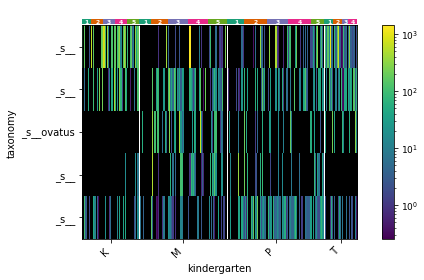

In [12]:
f=tt.plot(gui='cli', sample_field='kindergarten', feature_field='taxonomy',barx_fields='time_int',yticklabel_len=None,yticklabel_kwargs={'size':10, 'rotation':0})

In [13]:
f.save_figure('figures/heatmap-permanova-seqs.pdf')